# Evaluation of the occlusion sensitivity experiments
These Notebook evaluates the first try of occlusion sensitivity. A patch is occluded in the source and the generator separates the signal. This can be compared to the unperturbed generation. Based on the difference in the correlation coefficient, we defined a score to show which occluded patch has the most overall relevance. 

In [8]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from xai import read_occ_data, calc_importance
from xai import plot_occluded_map, plot_r_occ_sample, plot_occlusion_sensitivity

The next cell needs user input:

In [9]:
base_output_dir = "../output/" # Meanwhile I have my own output directory with GAN results
names = ['test', 'xai_exp_occlusion' ]
results_dir = "../output/xai_occlusion_results/"
nrun = 100
nindex = 1
suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]
ref_dir = os.path.join(base_output_dir, names[0])
occ_dir = os.path.join(base_output_dir, names[1])
suffix=f"run50_index0" #what is wrong with run60_index0? 71

## Evaluation of single samples

Saved plot ../output/xai_occlusion_results//compare_occlusion_exprun50_index0.png


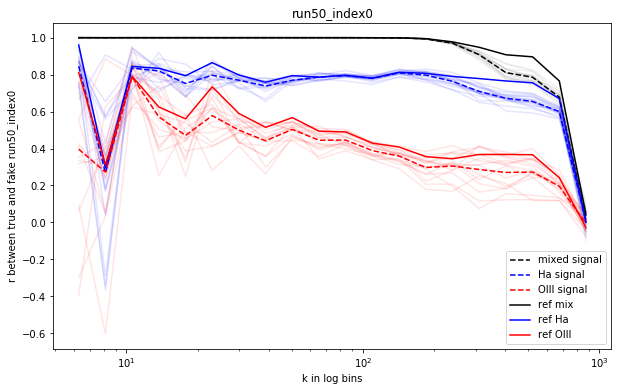

In [10]:
plot_r_occ_sample(ref_dir, occ_dir, results_dir, 16, suffix)

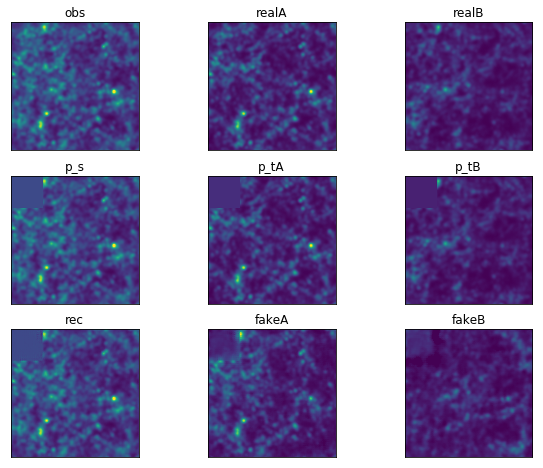

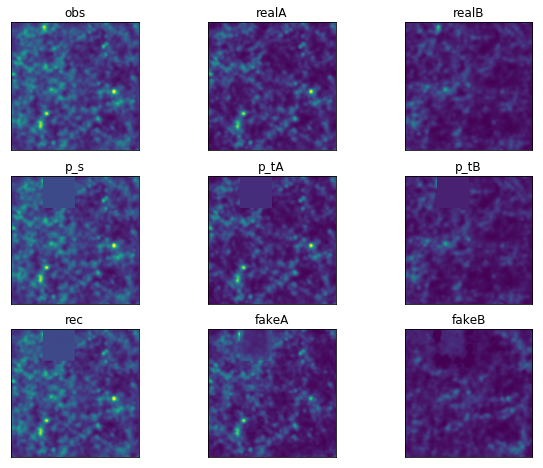

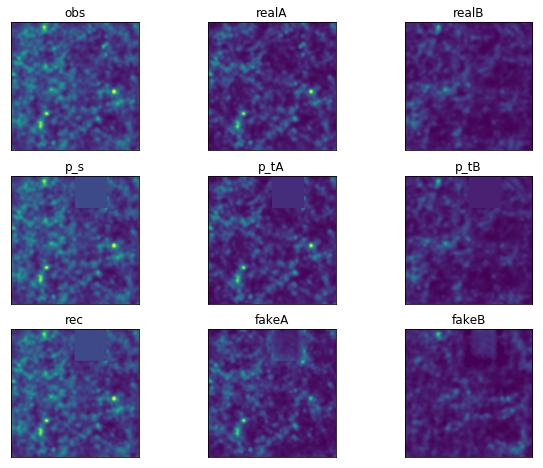

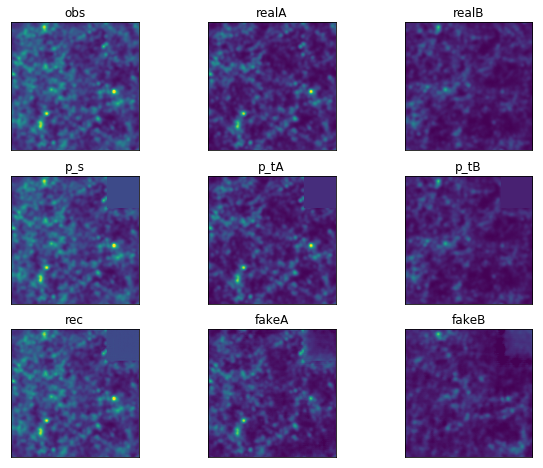

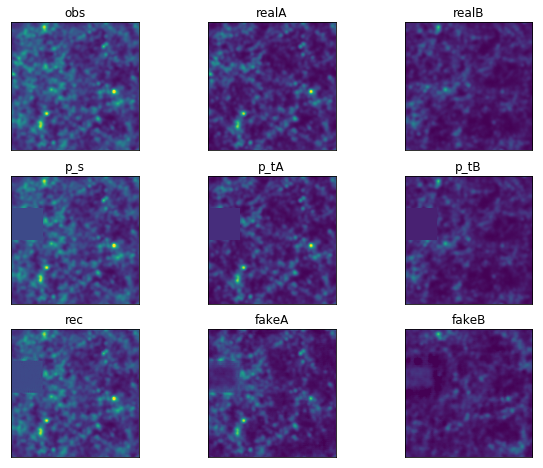

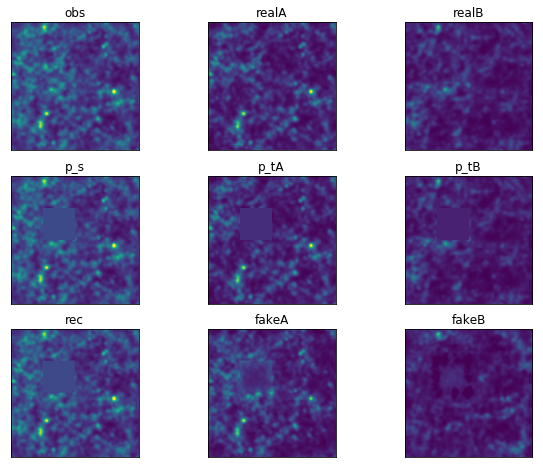

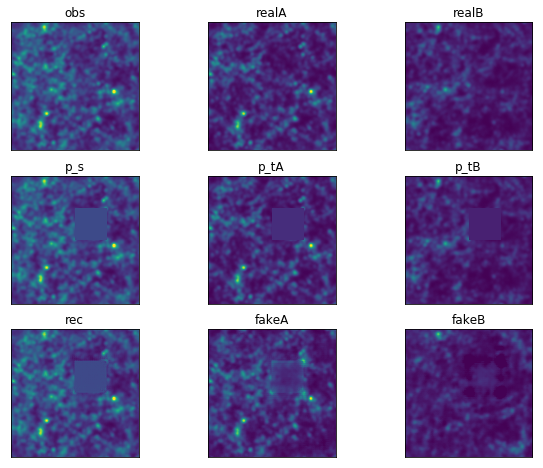

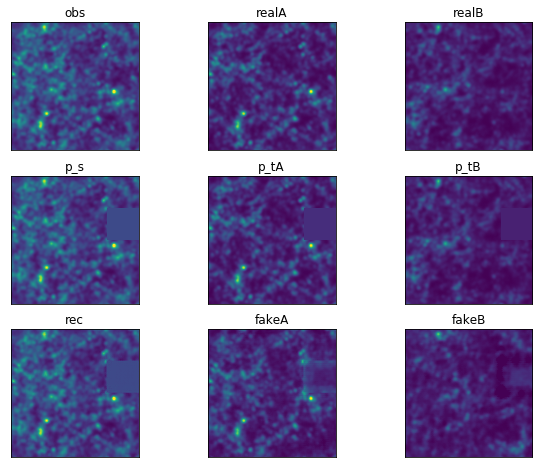

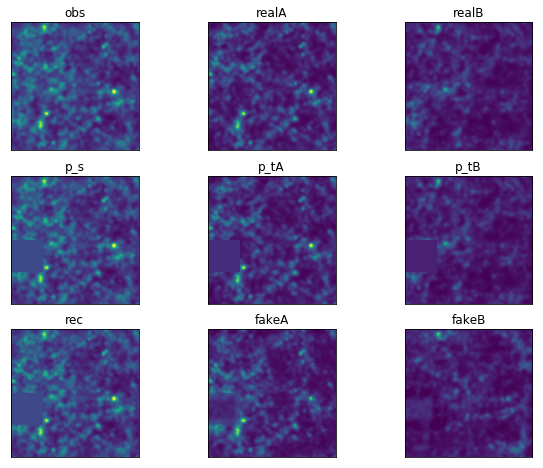

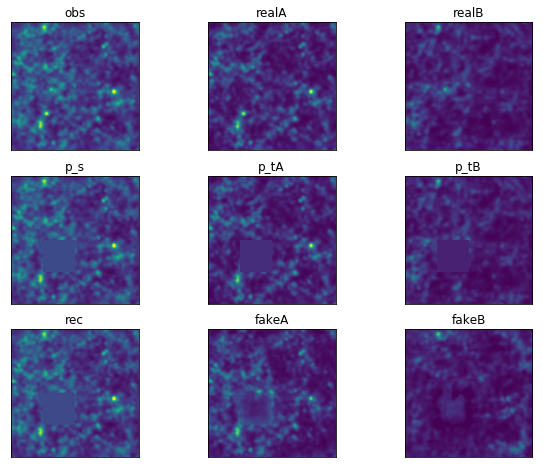

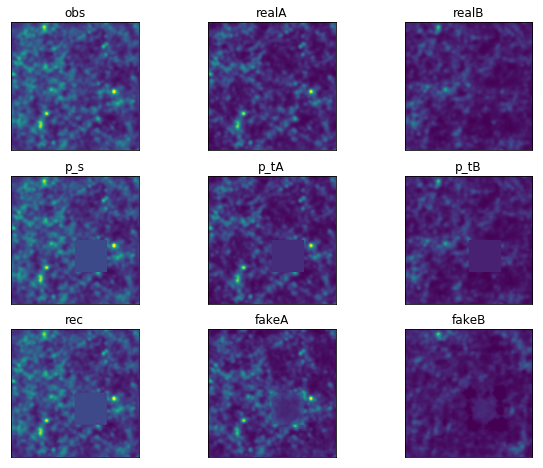

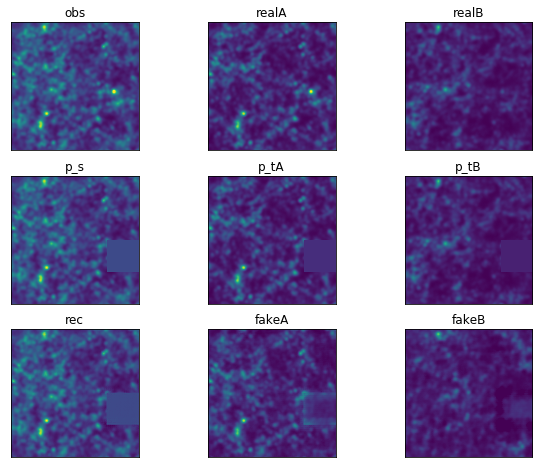

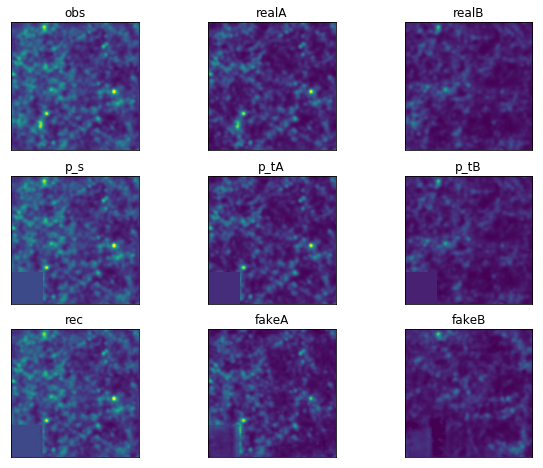

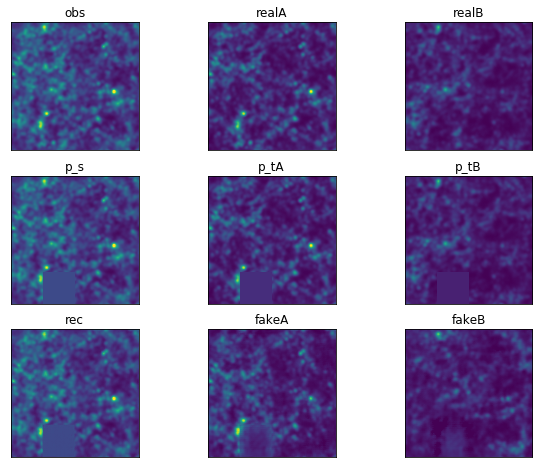

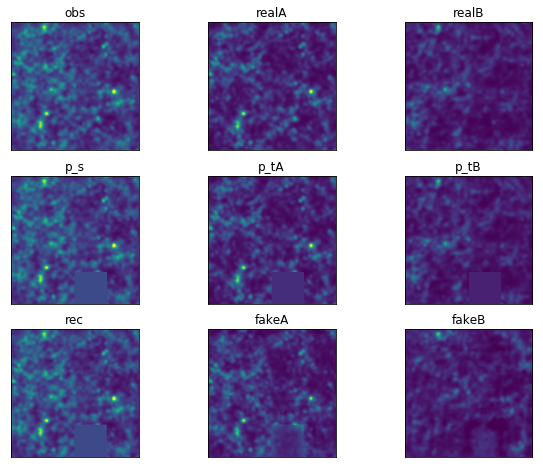

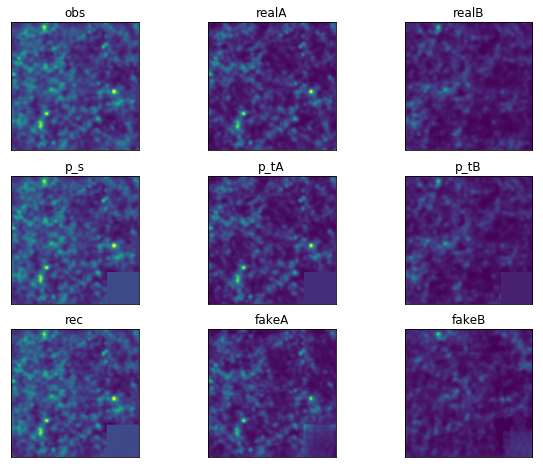

In [11]:
for i in range(16):
    df = read_occ_data(occ_dir, i, suffix=suffix)
    plot_occluded_map(df, results_dir, i, exp_name=names[1], suffix=suffix)

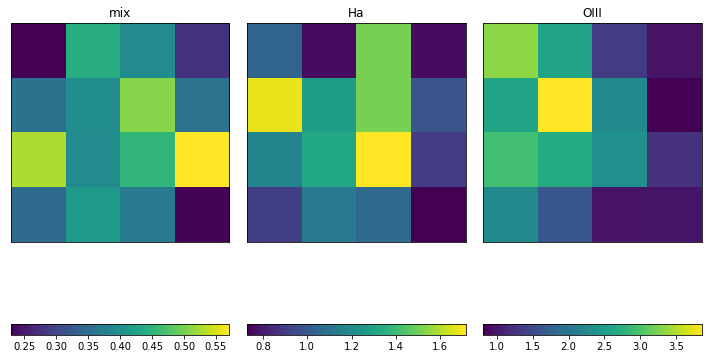

In [12]:
n_occ = 16
im_mix, im_ha, im_oiii = calc_importance(ref_dir, occ_dir, n_occ, suffix, nbins=20, log_bins=True)
plot_occlusion_sensitivity(im_mix, im_ha, im_oiii, results_dir)    